## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [16]:
# your code here

import torch


# We write a function to compute the sigmoid
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

# We define a function for the sigmoid gradient s'=s(1-s)
def sigmoidDerivative(x):
    return np.exp(-x)/(1+np.exp(-x))**2

In [17]:
# First we take 2 points
x1 = torch.tensor([2.0],requires_grad=True)
x2 = torch.tensor([8.0],requires_grad=True)

# We compute the sigmoid functions for the 2 points
y1 = sigmoid(x1)
y2 = sigmoid(x2)

# Next, we compute the gradient of y1, y2 with respect to x1, x2
y1.backward()
y2.backward()

explicit_x1 = sigmoidDerivative(x1.detach().numpy())
explicit_x2 = sigmoidDerivative(x2.detach().numpy())

print("Gradient of sigmoid at x=2 using PyTorch: ", x1.grad.item())
print("Gradient of sigmoid at x=2 using explicit formula: ", explicit_x1)
print()
print("Gradient of sigmoid at x=8 using Pytorch: ", x2.grad.item())
print("Gradient of sigmoid at x=8 using explicit formula: ", explicit_x2)

Gradient of sigmoid at x=2 using PyTorch:  0.10499356687068939
Gradient of sigmoid at x=2 using explicit formula:  [0.10499357]

Gradient of sigmoid at x=8 using Pytorch:  0.0003352376807015389
Gradient of sigmoid at x=8 using explicit formula:  [0.00033524]


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [18]:
x1 = torch.tensor([-2.0], requires_grad=True)
x2 = torch.tensor([5.0], requires_grad=True)

y1 = x1
y2 = x2

# Next, we compute the gradient of y1, y2 with respect to x1, x2
y1.backward()
y2.backward()

# And we print the gradients of x
print(x1.grad.item())
print(x2.grad.item())

# The linear function is f(x)=x so its derivatie it's f'(x)=1. The gradient of the points must be 1.

1.0
1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [19]:
# your code here
# We define ReLU function
def ReLU(x):
    return max(0,x)

def reluDerivative(x):
    if x > 0:
        return 1
    return 0

x1 = torch.tensor([8.0], requires_grad=True)
x2 = torch.tensor([4.0], requires_grad=True)

y1 = ReLU(x1)
y2 = ReLU(x2)

# Next, we compute the gradient of y1, y2 with respect to x1, x2
y1.backward()
y2.backward()

# And we print the gradients of x
explicit_x1 = reluDerivative(x1)
explicit_x2 = reluDerivative(x2)

print("Gradient of sigmoid at x=8 using PyTorch: ", x1.grad.item())
print("Gradient of sigmoid at x=8 using explicit formula: ", explicit_x1)
print()
print("Gradient of sigmoid at x=4 using Pytorch: ", x2.grad.item())
print("Gradient of sigmoid at x=4 using explicit formula: ", explicit_x2)

Gradient of sigmoid at x=8 using PyTorch:  1.0
Gradient of sigmoid at x=8 using explicit formula:  1

Gradient of sigmoid at x=4 using Pytorch:  1.0
Gradient of sigmoid at x=4 using explicit formula:  1


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

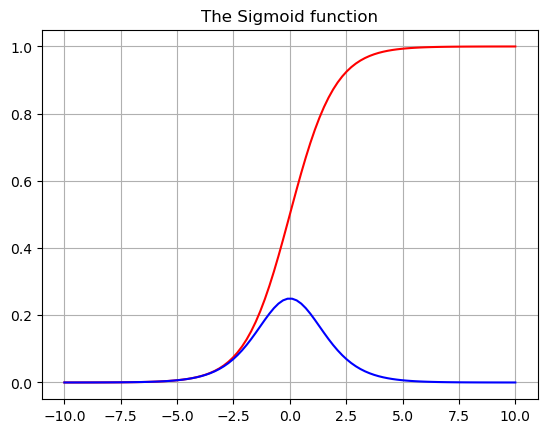

In [20]:
# your code here
from matplotlib import pylab
import pylab as plt
import numpy as np
import torch

# We write a function to compute the sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# We define a function for the sigmoid gradient
def sigmoidDerivative(x):
    return np.exp(-x)/(1+np.exp(-x))**2
    
# Now we plot the functions
x = plt.linspace(-10,10,100)
y = plt.linspace(-10,10,100)

plt.title("The Sigmoid function")
plt.grid()

plt.plot(x, sigmoid(x),'r')
plt.plot(y, sigmoidDerivative(y), 'b')

plt.show()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

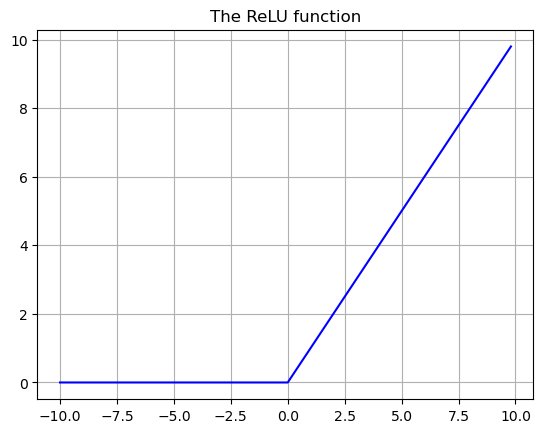

In [21]:
# your code here
def relu(x):
    return max(0,x)
def reluDerivative(x):
    if x > 0:
        return 1
    return 0
# We plot the relu function first
x = np.arange(-10,10,0.2)
reluPoints = [relu(z) for z in x]

plt.title("The ReLU function")
plt.grid()
plt.plot(x, reluPoints, 'b')

plt.show()

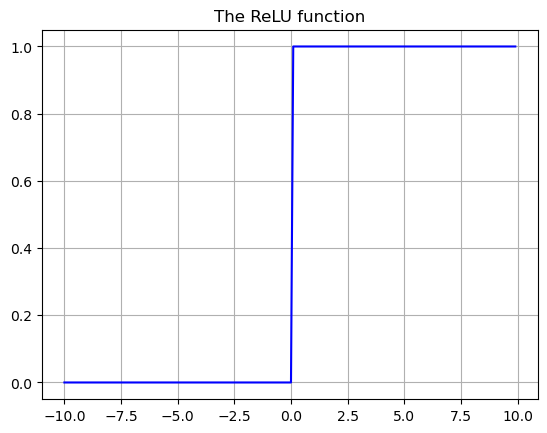

In [22]:
# Next we plot the derivative function
y = np.arange(-10,10,0.1)
reluPoints = [reluDerivative(z) for z in y]

plt.title("The ReLU function")
plt.grid()
plt.plot(y, reluPoints, 'b')

plt.show()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

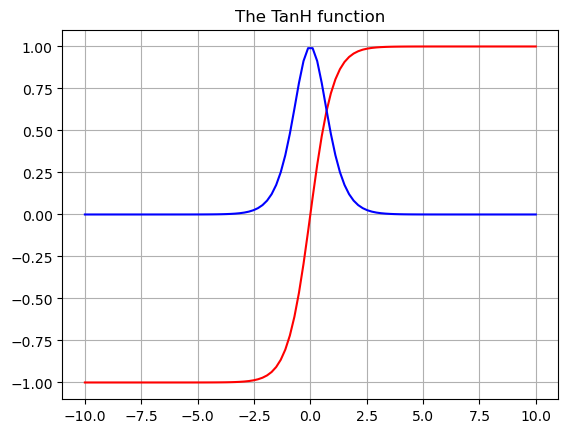

In [23]:
# your code here
# We define the Hyperbolic Tangent function
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
# Next we define its derivative
def tanhDerivative(x):
    return 1-tanh(x)**2
x = plt.linspace(-10,10,100)
y = plt.linspace(-10,10,100)

plt.title("The TanH function")
plt.grid()

plt.plot(x, tanh(x), 'r')
plt.plot(y, tanhDerivative(y), 'b')

plt.show()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

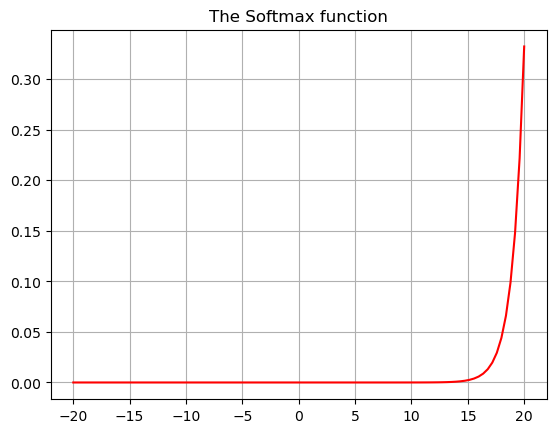

In [24]:
# your code here
# We define the softmax function
def softmax(x):
    e  = np.exp(x)
    return e / e.sum()
x = plt.linspace(-20,20,100)

plt.title("The Softmax function")
plt.grid()
plt.plot(x, softmax(x), 'r')

plt.show()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [ ]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [ ]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


In [ ]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [29]:
# We import the libraries
import torch
import torch.nn as nn
# We define the input and the output size
input_size = 2
output_size = 1

# We define the perceptron class
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim,output_dim)
        #self.activation = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear(x)
        #x = self.activation(x)
        return x
# We create an instance of the model
perceptron = Perceptron(input_size,output_size)

# Now we take a binary cross-entropy loss with stochastic gradient descent optimizer.

# Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1

# BCELoss measures the error of a reconstruction
# It creates a norm/criterion that calculates the Binary cross entropy between the target probabilities and input probabilities

# Binary cross entropy contrasts each of the predicted probability to actual output which can be 0 or 1.
# Combines the Sigmoid layer with the BCELoss
# It also computes the score that deals with the probability based on the distance from the expected value.
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.6)

# We generate the input data and the labels for the OR logical operation
input_data = torch.tensor([[0.0, 0.0], [0.0,0.1],[1.0,0.0], [1.0,1.0]], requires_grad=True).float()
labels = torch.tensor([[0.0], [1.0], [1.0], [1.0]]).float()

# Next, we train the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f} ')

Epoch [500/10000], Loss: 0.2979 
Epoch [1000/10000], Loss: 0.2627 
Epoch [1500/10000], Loss: 0.2341 
Epoch [2000/10000], Loss: 0.2102 
Epoch [2500/10000], Loss: 0.1900 
Epoch [3000/10000], Loss: 0.1728 
Epoch [3500/10000], Loss: 0.1581 
Epoch [4000/10000], Loss: 0.1454 
Epoch [4500/10000], Loss: 0.1343 
Epoch [5000/10000], Loss: 0.1247 
Epoch [5500/10000], Loss: 0.1162 
Epoch [6000/10000], Loss: 0.1087 
Epoch [6500/10000], Loss: 0.1020 
Epoch [7000/10000], Loss: 0.0960 
Epoch [7500/10000], Loss: 0.0906 
Epoch [8000/10000], Loss: 0.0858 
Epoch [8500/10000], Loss: 0.0814 
Epoch [9000/10000], Loss: 0.0774 
Epoch [9500/10000], Loss: 0.0737 
Epoch [10000/10000], Loss: 0.0704 


In [27]:
# Finally, we evaluate the trained model and compute its accuracy

with torch.no_grad(): # evaluate the trained model
    # no_grad() tells PyTorch to not calculate the gradients
    outputs = perceptron(input_data)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == labels).float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  1.0
